In [1]:
!pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -monokai

In [4]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [5]:
# set_nb_theme('monokai')

In [6]:
print("\n")

# Belinda Gan - 2440094680 - LA05 LEC Intro to Data Science

### CC General Dataset

#### Data Dictionary

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [7]:
# ASSUMPTION

# Payment correlates with PRCFullPayment
# Oneoffpurchasefrequency correlates with Purchasesfrequency
# Purchasesinstallmentfrequency correlates with Purchasesfrequency
# Balancefrequency correlates with Balance
# Purchases correlated with Oneoffpurchases
# Purchases correlated with Installmentpurchases

In [8]:
# This case requires to develop a customer segmentation to define marketing strategy.
# The sample Dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioural variables.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn #import scikit-learn
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# K Means Clustering
from sklearn.cluster import KMeans

In [10]:
credit_card = pd.read_csv("CC GENERAL.csv")
credit_card.head(50)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [11]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
credit_card.shape

(8950, 18)

In [14]:
# dari data di atas, total variabel adalah 18 variabel / faktor yang memengaruhi behaviour dari 9000 customer

In [15]:
print("\n\n")

### Data Cleaning

In [16]:
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
credit_card["CREDIT_LIMIT"].fillna(value = credit_card["CREDIT_LIMIT"].mean(), inplace = True)

In [18]:
credit_card["MINIMUM_PAYMENTS"].fillna(value = credit_card["MINIMUM_PAYMENTS"].mean(), inplace = True)

In [19]:
credit_card.head(50)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [20]:
new_credit_card = credit_card.drop("CUST_ID", axis = 1)

In [21]:
print("\n")

## Feature Engineering

Similar to Titanic Supervised Learning Assignment, we categorize / drop outliers first to deal with extremely high values, so it'll be easier to create model

In [22]:
new_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [23]:
new_credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [24]:
# First, I found columns which have the similar max values and range of count (0 - 2) till max are Balance Frequency, Purchases Frequency, One Off Purchases Frequency, Purchases Installments Frequency, Cash Advance Frequency, and PRC Full Payment
category1 = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

In [25]:
# I determine the categorization from min, max, 25%, 50%, 75%, and mean from category1.

# for customer_dataset in category1:
    # customer_dataset.loc[(customer_dataset[category1] >= 0) & (customer_dataset[category1] <= 0.1), category1] = 1
    # customer_dataset.loc[(customer_dataset[category1] > 0.1) & (customer_dataset[category1] <= 0.2), category1] = 2
    # customer_dataset.loc[(customer_dataset[category1] > 0.2) & (customer_dataset[category1] <= 0.3), category1] = 3
    # customer_dataset.loc[(customer_dataset[category1] > 0.3) & (customer_dataset[category1] <= 0.4), category1] = 4
    # customer_dataset.loc[(customer_dataset[category1] > 0.4) & (customer_dataset[category1] <= 0.5), category1] = 5
    # customer_dataset.loc[(customer_dataset[category1] > 0.5) & (customer_dataset[category1] <= 0.6), category1] = 6
    # customer_dataset.loc[(customer_dataset[category1] > 0.6) & (customer_dataset[category1] <= 0.7), category1] = 7
    # customer_dataset.loc[(customer_dataset[category1] > 0.7) & (customer_dataset[category1] <= 0.8), category1] = 8
    # customer_dataset.loc[(customer_dataset[category1] > 0.8) & (customer_dataset[category1] <= 0.9), category1] = 9
    # customer_dataset.loc[(customer_dataset[category1] > 0.9) & (customer_dataset[category1] <= 1), category1] = 10
    # customer_dataset.loc[customer_dataset[category1] > 1, category1] = 11

In [26]:
for customer in category1:
    new_credit_card[customer + "_RANGE"] = 0
    new_credit_card.loc[(new_credit_card[customer] >= 0) & (new_credit_card[customer] <= 0.1), customer] = 1
    new_credit_card.loc[(new_credit_card[customer] > 0.1) & (new_credit_card[customer] <= 0.2), customer] = 2
    new_credit_card.loc[(new_credit_card[customer] > 0.2) & (new_credit_card[customer] <= 0.3), customer] = 3
    new_credit_card.loc[(new_credit_card[customer] > 0.3) & (new_credit_card[customer] <= 0.4), customer] = 4
    new_credit_card.loc[(new_credit_card[customer] > 0.4) & (new_credit_card[customer] <= 0.5), customer] = 5
    new_credit_card.loc[(new_credit_card[customer] > 0.5) & (new_credit_card[customer] <= 0.6), customer] = 6
    new_credit_card.loc[(new_credit_card[customer] > 0.6) & (new_credit_card[customer] <= 0.7), customer] = 7
    new_credit_card.loc[(new_credit_card[customer] > 0.7) & (new_credit_card[customer] <= 0.8), customer] = 8
    new_credit_card.loc[(new_credit_card[customer] > 0.8) & (new_credit_card[customer] <= 0.9), customer] = 9
    new_credit_card.loc[(new_credit_card[customer] > 0.9) & (new_credit_card[customer] <= 1), customer] = 10
    new_credit_card.loc[new_credit_card[customer] > 1, customer] = 11

In [27]:
# Second, I found other columns which have the similar max values and range of count (ratusan) till max are Balance Frequency, Purchases Frequency, One Off Purchases Frequency, Purchases Installments Frequency, Cash Advance Frequency, and PRC Full Payment
category2 = ["CASH_ADVANCE_TRX", "PURCHASES_TRX"]

In [28]:
category2_visual = pd.DataFrame(new_credit_card[category2])

In [29]:
plt.rcParams["figure.figsize"] = (10, 6) # to change bar chart size
# category2_visual.plot.bar(figsize = (20, 10), stacked = True)

In [30]:
q1 = category2_visual.quantile(0.25)
q2 = category2_visual.quantile(0.5)
q3 = category2_visual.quantile(0.75)
interquartile = q3 - q1
interquartile

CASH_ADVANCE_TRX     4.0
PURCHASES_TRX       16.0
dtype: float64

In [31]:
q1

CASH_ADVANCE_TRX    0.0
PURCHASES_TRX       1.0
Name: 0.25, dtype: float64

In [32]:
q2

CASH_ADVANCE_TRX    0.0
PURCHASES_TRX       7.0
Name: 0.5, dtype: float64

In [33]:
q3

CASH_ADVANCE_TRX     4.0
PURCHASES_TRX       17.0
Name: 0.75, dtype: float64

In [34]:
# categorize data and remove outlier based on min, Q1, Q2, Q3, IQR, and max of category2
for customer in category2:
    new_credit_card[customer + "_RANGE"] = 0
    new_credit_card.loc[(new_credit_card[customer] >= 0) & (new_credit_card[customer] < 7), customer] = 1
    new_credit_card.loc[(new_credit_card[customer] >= 7) & (new_credit_card[customer] < 16), customer] = 2
    new_credit_card.loc[(new_credit_card[customer] >= 16) & (new_credit_card[customer] <= 30), customer] = 3
    new_credit_card.loc[(new_credit_card[customer] > 30) & (new_credit_card[customer] <= 50), customer] = 4
    new_credit_card.loc[(new_credit_card[customer] > 50) & (new_credit_card[customer] <= 123), customer] = 5
    new_credit_card.loc[(new_credit_card[customer] > 123) & (new_credit_card[customer] < 400), customer] = 6

In [35]:
new_credit_card.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE
0,40.900749,11.0,95.40,0.00,95.40,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
1,3202.467416,11.0,0.00,0.00,0.00,6442.945483,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
2,2495.148862,11.0,773.17,773.17,0.00,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
3,1666.670542,11.0,1499.00,1499.00,0.00,205.788017,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
4,817.714335,11.0,16.00,16.00,0.00,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
5,1809.828751,11.0,1333.28,0.00,1333.28,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
6,627.260806,11.0,7091.01,6402.63,688.38,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
7,1823.652743,11.0,436.20,0.00,436.20,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
8,1014.926473,11.0,861.49,661.49,200.00,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0
9,152.225975,11.0,1281.60,1281.60,0.00,0.000000,11.0,11.0,11.0,11.0,...,11.0,12,0,0,0,0,0,0,0,0


In [36]:
new_credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE
count,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.0,8950.0,8950.0,...,8950.0,8950.000000,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0
mean,1564.474828,11.0,1003.204834,592.437371,411.067645,978.871112,11.0,11.0,11.0,11.0,...,11.0,11.517318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2081.531879,0.0,2136.634782,1659.887917,904.338115,2097.163877,0.0,0.0,0.0,0.0,...,0.0,1.338331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,11.0,0.000000,0.000000,0.000000,0.000000,11.0,11.0,11.0,11.0,...,11.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,128.281915,11.0,39.635000,0.000000,0.000000,0.000000,11.0,11.0,11.0,11.0,...,11.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,873.385231,11.0,361.280000,38.000000,89.000000,0.000000,11.0,11.0,11.0,11.0,...,11.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2054.140036,11.0,1110.130000,577.405000,468.637500,1113.821139,11.0,11.0,11.0,11.0,...,11.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19043.138560,11.0,49039.570000,40761.250000,22500.000000,47137.211760,11.0,11.0,11.0,11.0,...,11.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Third, I found other columns which have the similar max values and range of count (ribuan, puluh ribuan) till max are Balance, Purchases, One Off Purchases, Installment Purchases, Cash Advance, Credit Limit, Payments, Minimum Payments
category3 = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

In [38]:
# plt.rcParams["figure.figsize"] = (10, 6) # to change bar chart size
category3_visual = pd.DataFrame(new_credit_card[category3])

In [39]:
# category3_visual.plot.bar(figsize = (20, 10))

In [40]:
q1_category3 = category3_visual.quantile(0.25)
q2_category3 = category3_visual.quantile(0.5)
q3_category3 = category3_visual.quantile(0.75)
interquartile = q3_category3 - q1_category3
interquartile

BALANCE                   1925.858120
PURCHASES                 1070.495000
ONEOFF_PURCHASES           577.405000
INSTALLMENTS_PURCHASES     468.637500
CASH_ADVANCE              1113.821139
CREDIT_LIMIT              4900.000000
PAYMENTS                  1517.858151
MINIMUM_PAYMENTS           693.348888
dtype: float64

In [41]:
q1_category3

BALANCE                    128.281915
PURCHASES                   39.635000
ONEOFF_PURCHASES             0.000000
INSTALLMENTS_PURCHASES       0.000000
CASH_ADVANCE                 0.000000
CREDIT_LIMIT              1600.000000
PAYMENTS                   383.276166
MINIMUM_PAYMENTS           170.857654
Name: 0.25, dtype: float64

In [42]:
q2_category3

BALANCE                    873.385231
PURCHASES                  361.280000
ONEOFF_PURCHASES            38.000000
INSTALLMENTS_PURCHASES      89.000000
CASH_ADVANCE                 0.000000
CREDIT_LIMIT              3000.000000
PAYMENTS                   856.901546
MINIMUM_PAYMENTS           335.628312
Name: 0.5, dtype: float64

In [43]:
q3_category3

BALANCE                   2054.140036
PURCHASES                 1110.130000
ONEOFF_PURCHASES           577.405000
INSTALLMENTS_PURCHASES     468.637500
CASH_ADVANCE              1113.821139
CREDIT_LIMIT              6500.000000
PAYMENTS                  1901.134317
MINIMUM_PAYMENTS           864.206542
Name: 0.75, dtype: float64

In [44]:
# Again, I take advantage of min, Q1, Q2, Q3, IQR, and max of category3 to categorize data and remove outliers
for customer in category3:
    new_credit_card[customer + "_RANGE"] = 0
    new_credit_card.loc[(new_credit_card[customer] >= 0) & (new_credit_card[customer] < 38), customer] = 1
    new_credit_card.loc[(new_credit_card[customer] >= 38) & (new_credit_card[customer] < 89), customer] = 2
    new_credit_card.loc[(new_credit_card[customer] >= 89) & (new_credit_card[customer] <= 128), customer] = 3
    new_credit_card.loc[(new_credit_card[customer] > 128) & (new_credit_card[customer] <= 170), customer] = 4
    new_credit_card.loc[(new_credit_card[customer] > 170) & (new_credit_card[customer] <= 335), customer] = 5
    new_credit_card.loc[(new_credit_card[customer] > 335) & (new_credit_card[customer] <= 361), customer] = 6
    new_credit_card.loc[(new_credit_card[customer] > 361) & (new_credit_card[customer] <= 383), customer] = 7
    new_credit_card.loc[(new_credit_card[customer] > 383) & (new_credit_card[customer] <= 468), customer] = 8
    new_credit_card.loc[(new_credit_card[customer] > 468) & (new_credit_card[customer] <= 577), customer] = 9
    new_credit_card.loc[(new_credit_card[customer] > 577) & (new_credit_card[customer] <= 693), customer] = 10
    new_credit_card.loc[(new_credit_card[customer] > 693) & (new_credit_card[customer] <= 856), customer] = 11
    new_credit_card.loc[(new_credit_card[customer] > 856) & (new_credit_card[customer] <= 1070), customer] = 12
    new_credit_card.loc[(new_credit_card[customer] > 1070) & (new_credit_card[customer] <= 1113), customer] = 13
    new_credit_card.loc[(new_credit_card[customer] > 1113) & (new_credit_card[customer] < 1600), customer] = 14
    new_credit_card.loc[(new_credit_card[customer] >= 1600) & (new_credit_card[customer] < 1925), customer] = 15
    new_credit_card.loc[(new_credit_card[customer] >= 1925) & (new_credit_card[customer] < 3000), customer] = 16
    new_credit_card.loc[(new_credit_card[customer] > 3000) & (new_credit_card[customer] < 4900), customer] = 17
    new_credit_card.loc[(new_credit_card[customer] > 4900) & (new_credit_card[customer] < 6500), customer] = 18
    new_credit_card.loc[(new_credit_card[customer] >= 6500) & (new_credit_card[customer] <= 19043), customer] = 19
    new_credit_card.loc[new_credit_card[customer] > 19403, customer] = 20

In [45]:
new_credit_card.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE
0,2.0,11.0,3.0,1.0,3.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
1,17.0,11.0,1.0,1.0,1.0,18.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,11.0,11.0,11.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,11.0,14.0,14.0,1.0,5.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,11.0,11.0,1.0,1.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,11.0,14.0,1.0,14.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
6,10.0,11.0,19.0,18.0,10.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
7,15.0,11.0,8.0,1.0,8.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
8,12.0,11.0,12.0,10.0,5.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
9,4.0,11.0,14.0,14.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
new_credit_card.isnull().sum()

BALANCE                                   0
BALANCE_FREQUENCY                         0
PURCHASES                                 0
ONEOFF_PURCHASES                          0
INSTALLMENTS_PURCHASES                    0
CASH_ADVANCE                              0
PURCHASES_FREQUENCY                       0
ONEOFF_PURCHASES_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY          0
CASH_ADVANCE_FREQUENCY                    0
CASH_ADVANCE_TRX                          0
PURCHASES_TRX                             0
CREDIT_LIMIT                              0
PAYMENTS                                  0
MINIMUM_PAYMENTS                          0
PRC_FULL_PAYMENT                          0
TENURE                                    0
BALANCE_FREQUENCY_RANGE                   0
PURCHASES_FREQUENCY_RANGE                 0
ONEOFF_PURCHASES_FREQUENCY_RANGE          0
PURCHASES_INSTALLMENTS_FREQUENCY_RANGE    0
CASH_ADVANCE_FREQUENCY_RANGE              0
PRC_FULL_PAYMENT_RANGE          

In [47]:
new_credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE
count,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.0,8950.0,8950.0,...,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0
mean,12.108284,11.0,8.590838,10.027634,5.314190,6.220447,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,201.281298,0.0,60.895703,290.228651,32.036231,6.539633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,11.0,1.000000,1.000000,1.000000,1.000000,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,11.0,2.000000,1.000000,1.000000,1.000000,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.000000,11.0,7.000000,2.000000,3.000000,1.000000,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.000000,11.0,13.000000,9.750000,9.000000,14.000000,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19043.138560,11.0,4900.000000,19150.020000,3000.000000,20.000000,11.0,11.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
print("\n")

In [49]:
# Standardize Data
# data_scaling = StandardScaler()
# scaled_data = data_scaling.fit_transform(credit_card)

In [50]:
# Standardize the Data
data_scaling = StandardScaler()
scaled_data = data_scaling.fit_transform(new_credit_card)

In [51]:
# Normalize the Data
normalized_data = normalize(scaled_data)

In [52]:
min_max_scaling = MinMaxScaler()
min_max_scaled_data = min_max_scaling.fit_transform(new_credit_card)

In [53]:
# we use PCA to reduce dimensions to 2D data
reduce_dimension = PCA(n_components = 2)
principal_component = reduce_dimension.fit_transform(normalized_data)
principal_component

array([[-0.37497688, -0.7048884 ],
       [ 0.89466347, -0.18306905],
       [-0.7434371 , -0.17427275],
       ...,
       [ 0.20769989, -0.03208654],
       [ 0.20886412, -0.03530929],
       [ 0.16525058,  0.33813346]])

In [54]:
# Hierarchical Clustering
principal_component = pd.DataFrame(principal_component, columns = ["Component 1", "Component 2"])
# principal_component.columns = ["Component 1", "Component 2"]
principal_component.head(10)

,Component 1,Component 2
0,-0.374977,-0.704888
1,0.894663,-0.183069
2,-0.743437,-0.174273
3,-0.014778,-0.794598
4,-0.368746,-0.707651
5,-0.734211,-0.120637
6,-0.430272,0.884215
7,-0.756414,-0.157054
8,-0.382273,-0.694092
9,-0.375142,-0.696501


In [55]:
# K Means Clustering
principal_component_k = principal_component.copy()
# principal_component_k = pd.DataFrame(principal_component_k, columns = ["K_Component 1, K_Component 2"]) 
# Kalau pasang pd.DataFrame lagi, nanti jadi NAN semua
# principal_component_k.columns = ["Component 1, Component 2"]
principal_component_k.head(10)

,Component 1,Component 2
0,-0.374977,-0.704888
1,0.894663,-0.183069
2,-0.743437,-0.174273
3,-0.014778,-0.794598
4,-0.368746,-0.707651
5,-0.734211,-0.120637
6,-0.430272,0.884215
7,-0.756414,-0.157054
8,-0.382273,-0.694092
9,-0.375142,-0.696501


In [56]:
print("\n\n")

## Hierarchical Clustering

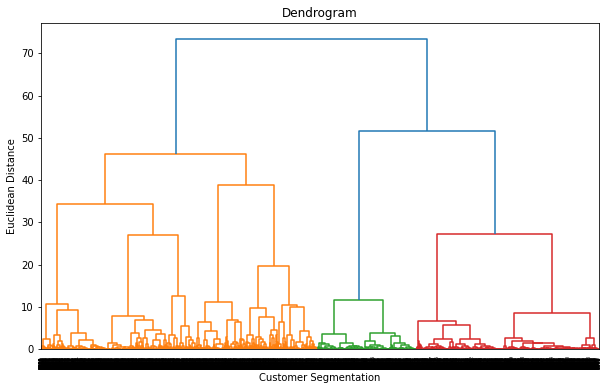

In [57]:
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customer Segmentation")
plt.ylabel("Euclidean Distance")
plt.show()

In [58]:
# fit hierarchical clustering to the credit card customers' behaviour dataset
hierarchical_clustering = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_predict = hierarchical_clustering.fit_predict(normalized_data)
y_predict

array([1, 0, 1, ..., 3, 3, 3], dtype=int64)

In [60]:
principal_component["HC Clusters"] = y_predict

In [61]:
# Further analysis about Cluster 0, 1, 2, 3, and 4 is in ASSIGNMENT 8 Unsupervised Learning.docx

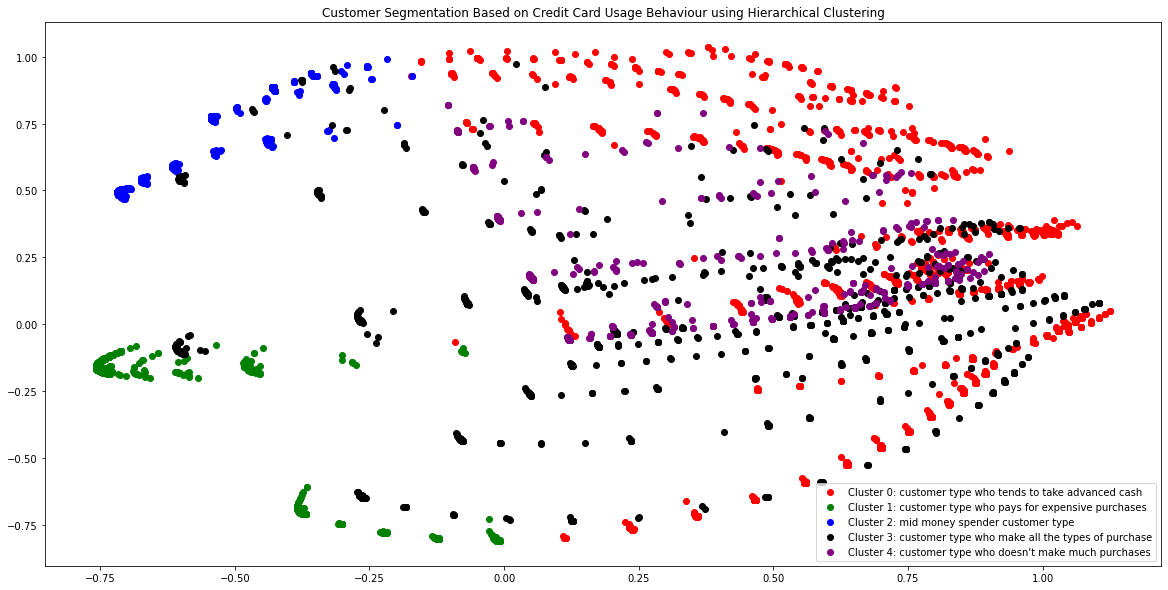

In [85]:
plt.figure(figsize = (20, 10))
plt.scatter(principal_component.loc[principal_component["HC Clusters"] == 0, "Component 1"], principal_component.loc[principal_component["HC Clusters"] == 0, "Component 2"], c = "r", label = "Cluster 0: customer type who tends to take advanced cash")
plt.scatter(principal_component.loc[principal_component["HC Clusters"] == 1, "Component 1"], principal_component.loc[principal_component["HC Clusters"] == 1, "Component 2"], c = "g", label = "Cluster 1: customer type who pays for expensive purchases")
plt.scatter(principal_component.loc[principal_component["HC Clusters"] == 2, "Component 1"], principal_component.loc[principal_component["HC Clusters"] == 2, "Component 2"], c = "b", label = "Cluster 2: mid money spender customer type")
plt.scatter(principal_component.loc[principal_component["HC Clusters"] == 3, "Component 1"], principal_component.loc[principal_component["HC Clusters"] == 3, "Component 2"], c = "black", label = "Cluster 3: customer type who make all the types of purchase")
plt.scatter(principal_component.loc[principal_component["HC Clusters"] == 4, "Component 1"], principal_component.loc[principal_component["HC Clusters"] == 4, "Component 2"], c = "purple", label = "Cluster 4: customer type who doesn't make much purchases")
plt.title("Customer Segmentation Based on Credit Card Usage Behaviour using Hierarchical Clustering")
plt.legend()
plt.show()

In [63]:
clustering2 = pd.concat([new_credit_card, pd.DataFrame({"HC Clusters": hierarchical_clustering.labels_})], axis = 1)
clustering2.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,HC Clusters
0,2.0,11.0,3.0,1.0,3.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
1,17.0,11.0,1.0,1.0,1.0,18.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,11.0,11.0,11.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
3,15.0,11.0,14.0,14.0,1.0,5.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
4,11.0,11.0,1.0,1.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
5,15.0,11.0,14.0,1.0,14.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
6,10.0,11.0,19.0,18.0,10.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,2
7,15.0,11.0,8.0,1.0,8.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
8,12.0,11.0,12.0,10.0,5.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
9,4.0,11.0,14.0,14.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1


C:\Users\Belinda Gan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


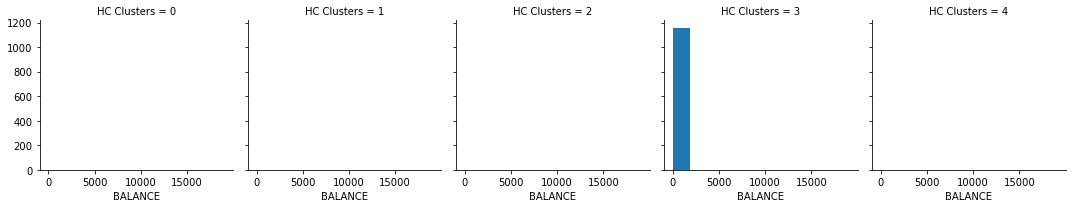

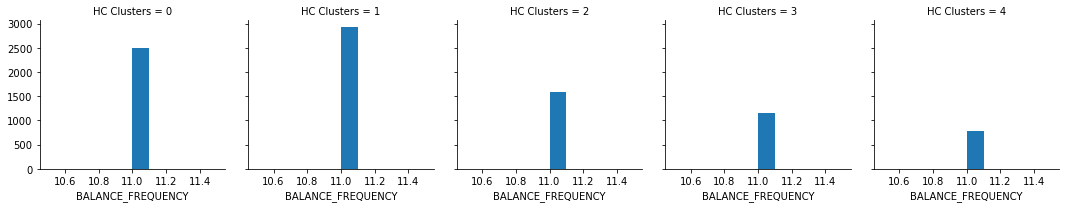

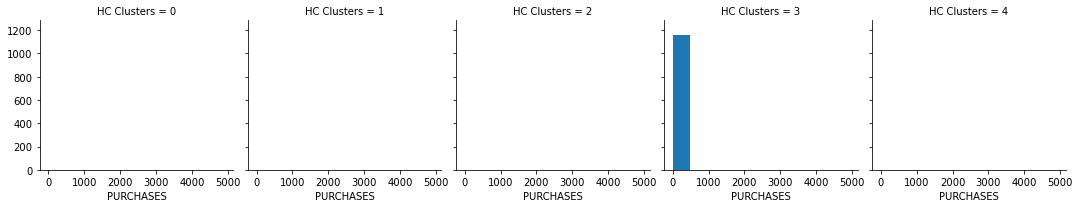

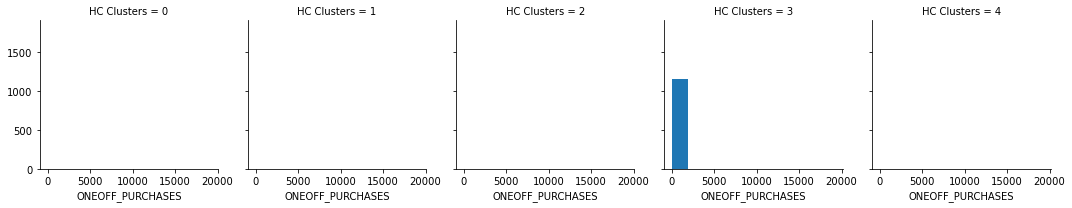

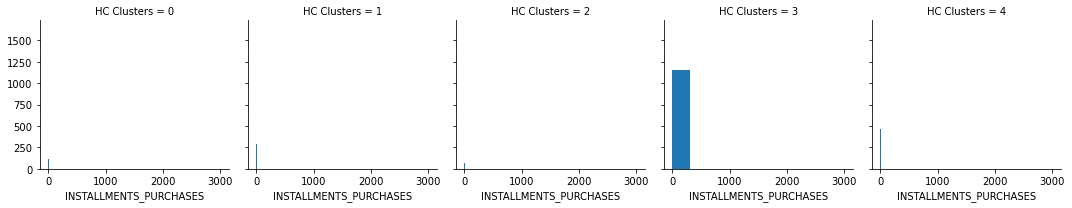

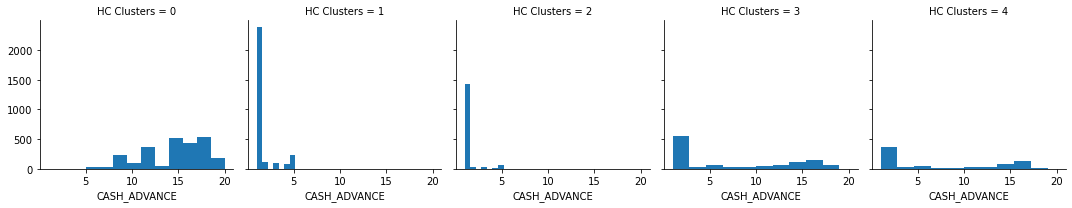

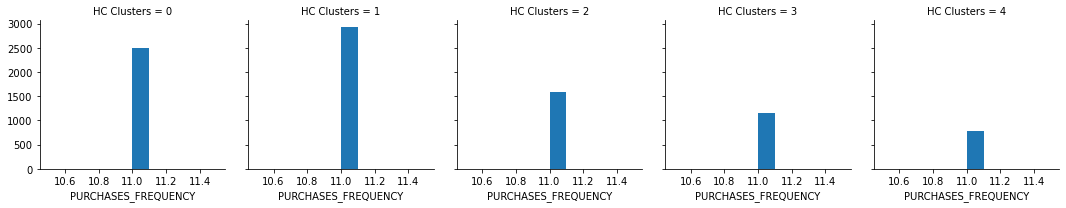

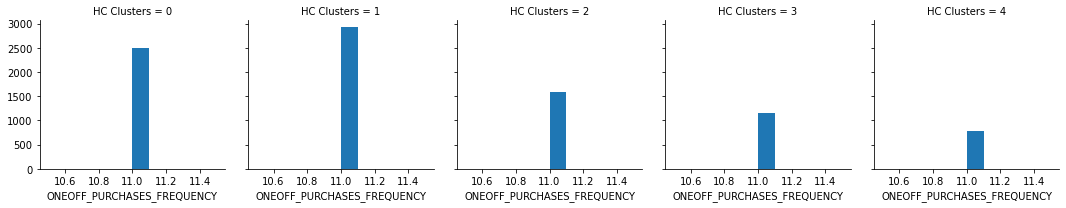

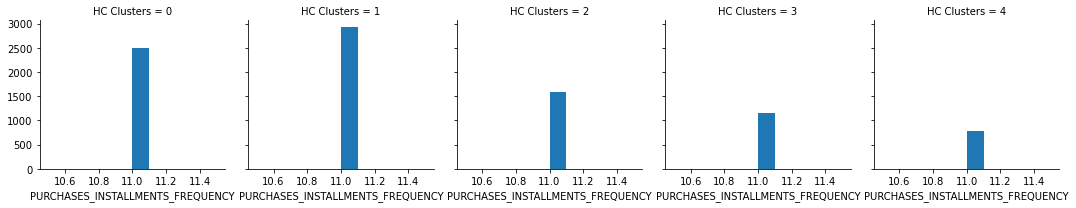

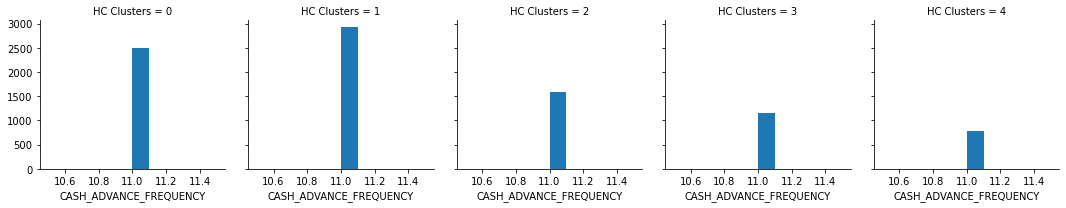

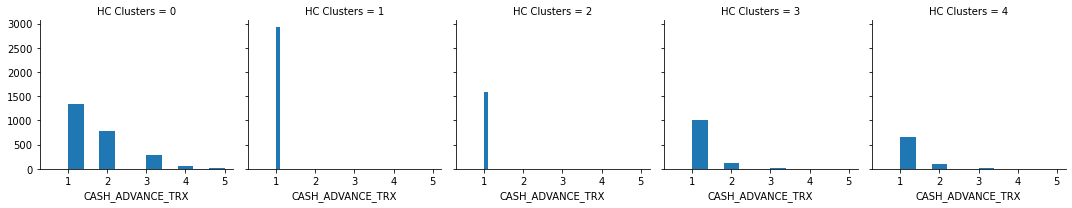

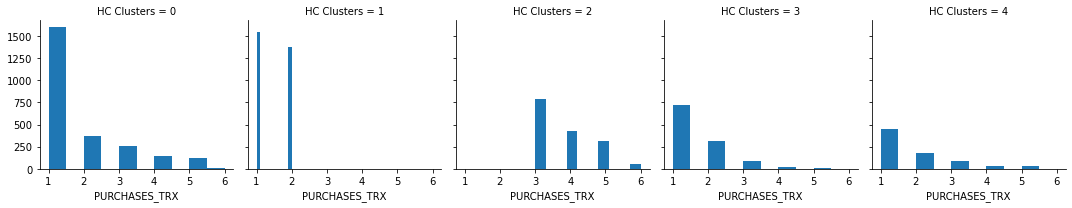

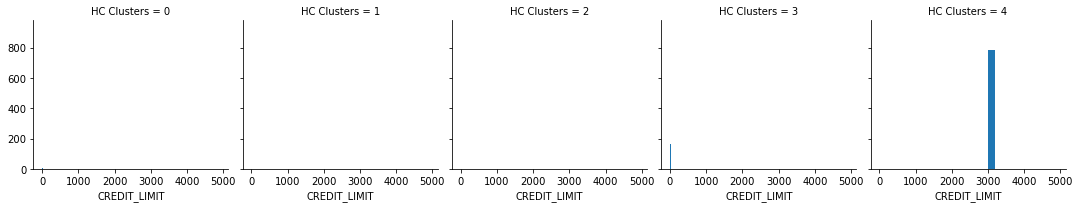

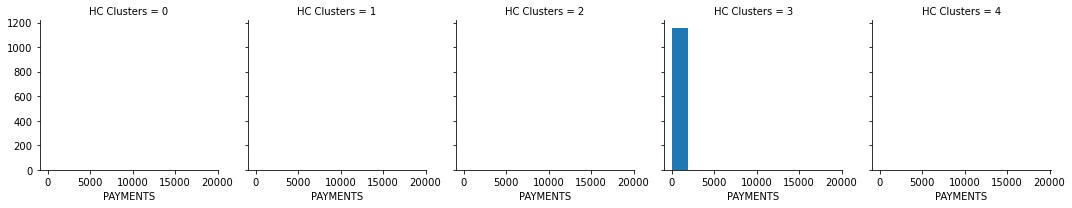

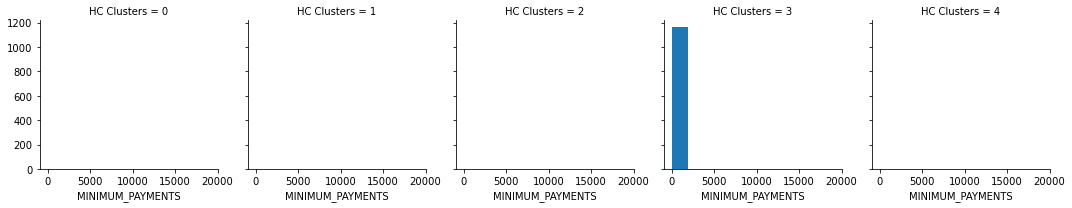

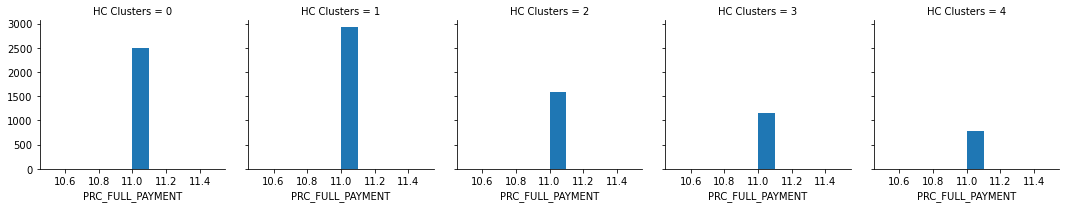

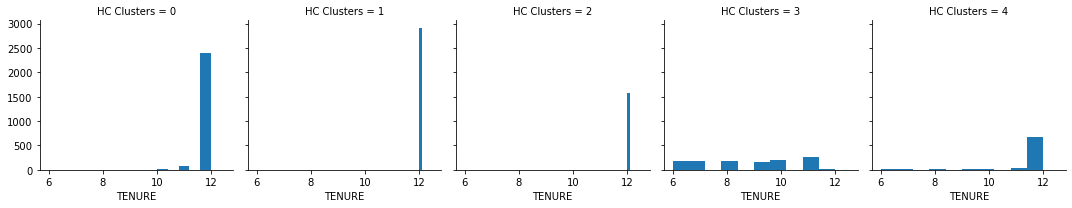

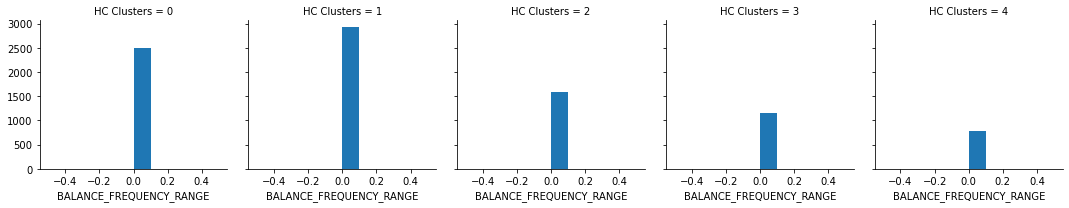

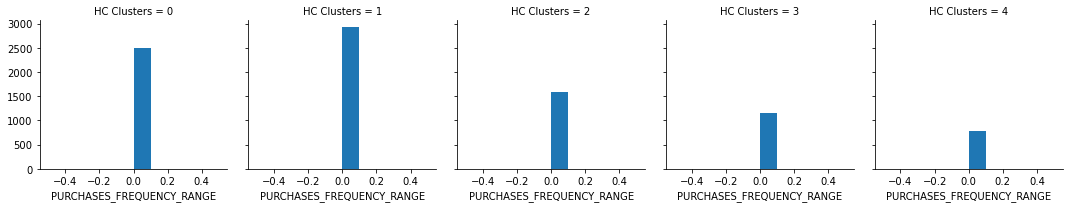

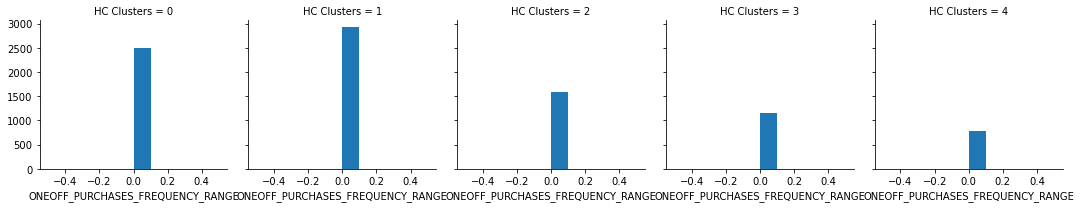

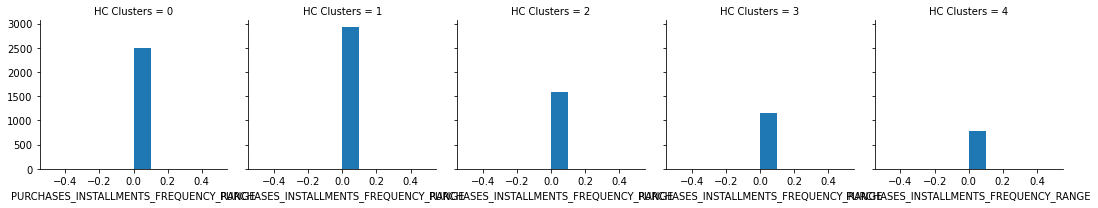

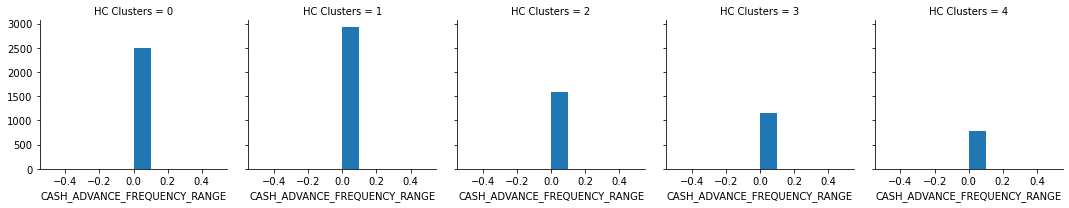

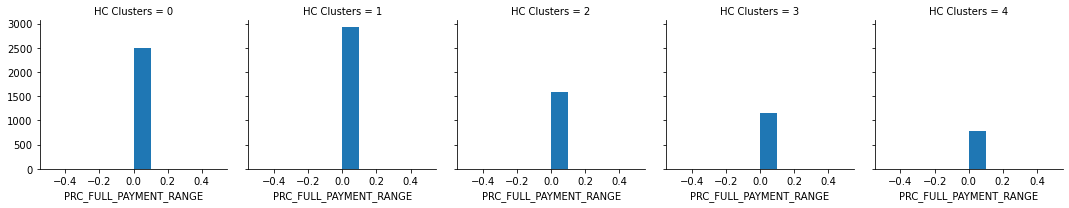

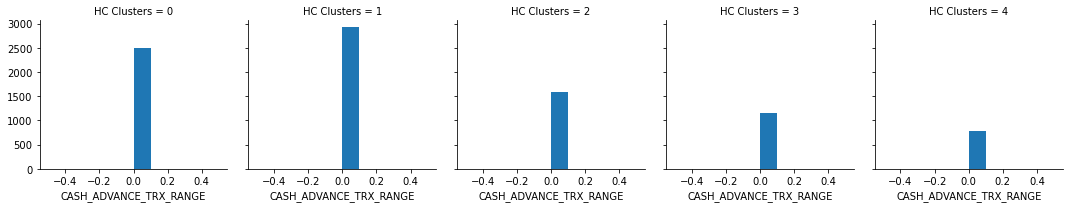

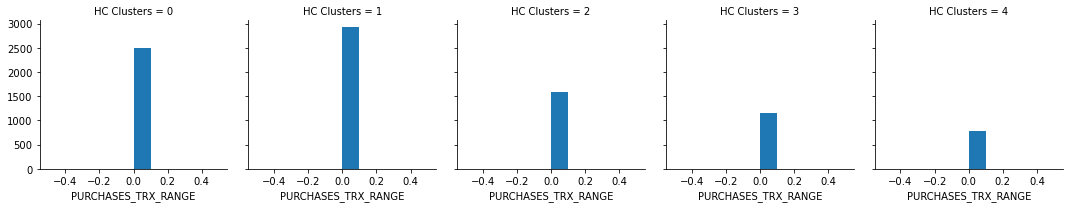

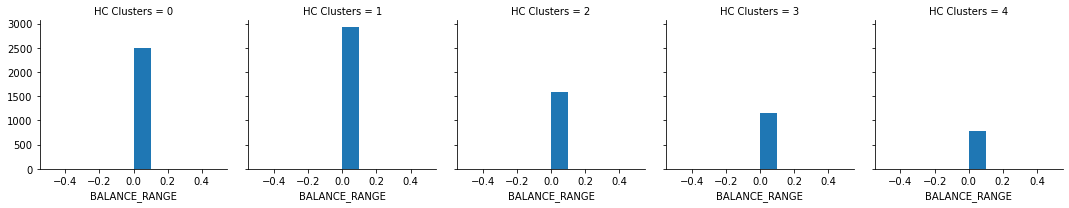

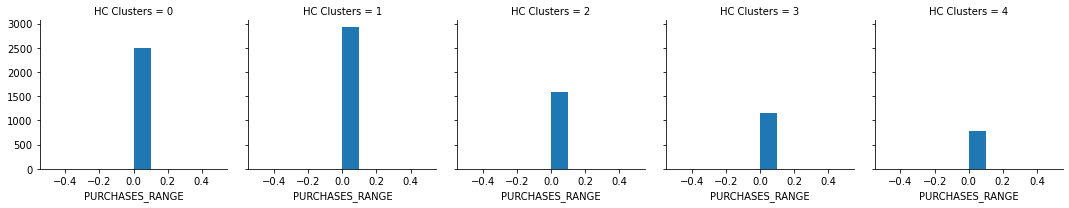

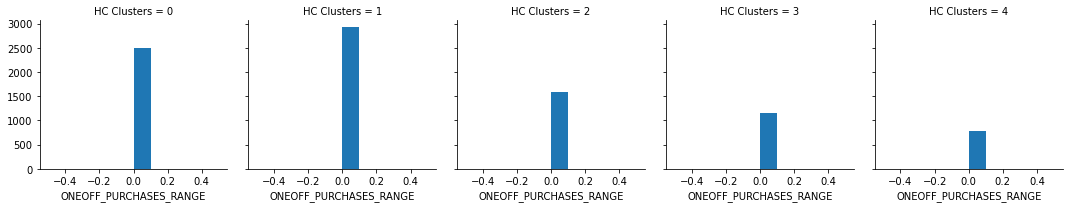

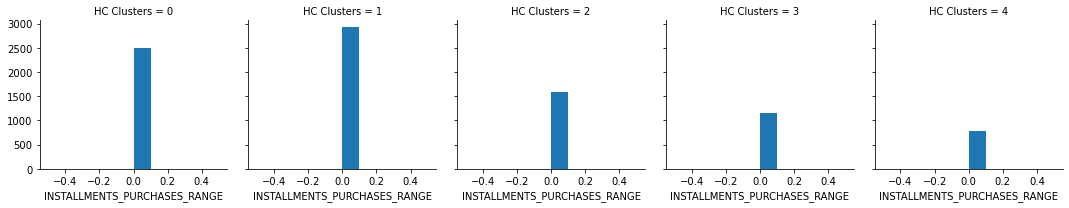

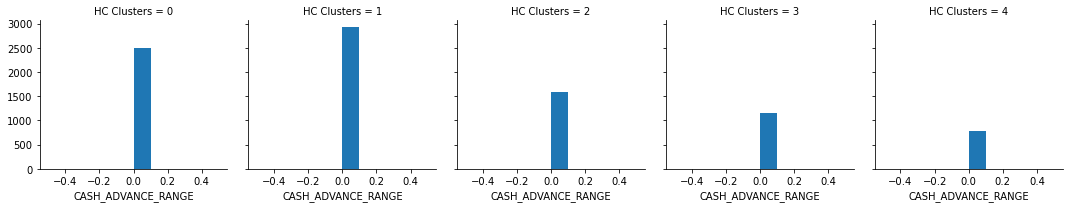

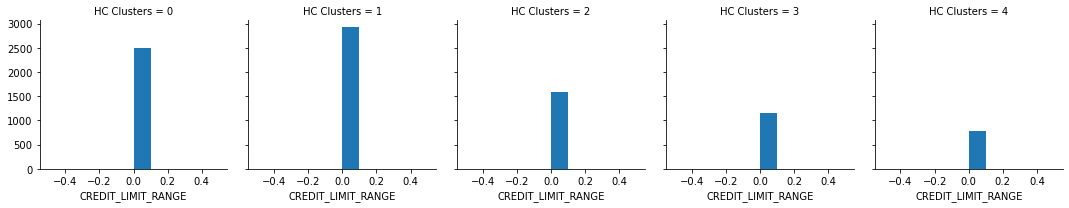

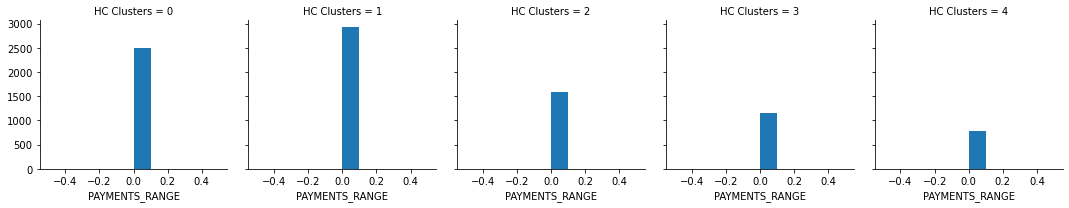

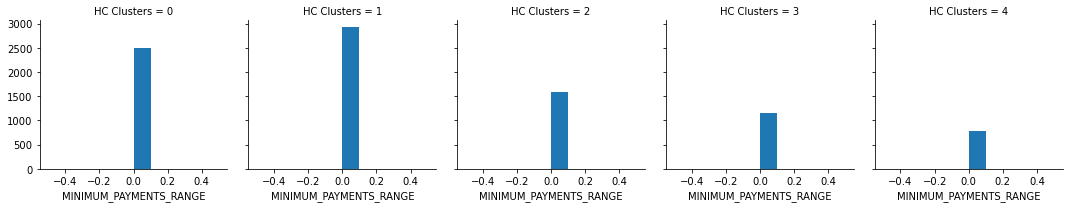

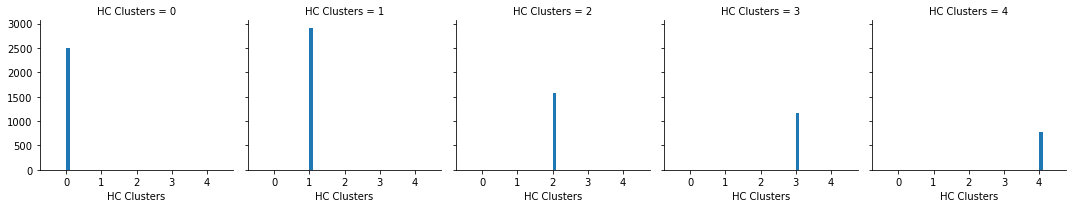

In [64]:
# to interpret the hierarchical clusters
for h_cluster in clustering2:
    grid = sns.FacetGrid(clustering2, col = "HC Clusters")
    grid.map(plt.hist, h_cluster)

In [65]:
print("\n\n")

## K Means Clustering

In [66]:
# we use PCA to reduce dimensions to 2D data
# reduce_dimension = PCA(n_components = 2)
# principal_component = reduce_dimension.fit_transform(normalized_data)
# principal_component

In [67]:
# principal_component_dataframe = pd.DataFrame(principal_component)
# principal_component_dataframe.columns = ["Component 1", "Component 2"]

In [68]:
# principal_component_dataframe.head(10)

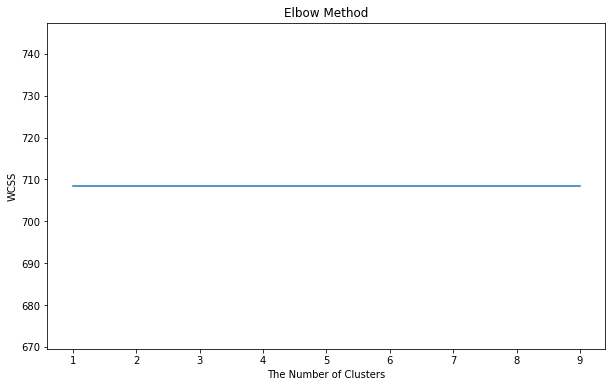

In [69]:
wcss = []
for index in range(1, 10):
    k_means = KMeans(n_clusters = 5, init = "k-means++", max_iter = 500, random_state = 42).fit(principal_component_k)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title("Elbow Method")
plt.xlabel("The Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [70]:
silhouette_scores = []

for index in range(2, 9):
    silhouette_scores.append(silhouette_score(principal_component_k, KMeans(n_clusters = index).fit_predict(principal_component_k)))

In [71]:
# hierarchical_clustering = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
# y_predict = hierarchical_clustering.fit_predict(normalized_data)
# y_predict
k_means = KMeans(n_clusters = 5)
y_predict2 = k_means.fit_predict(principal_component_k)
y_predict2

array([4, 1, 0, ..., 3, 3, 3])

Text(0.5, 1.0, 'Principal Component Analysis')

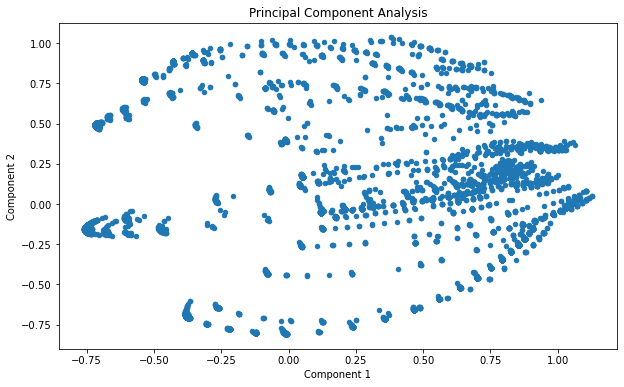

In [72]:
principal_component_k.plot.scatter(x = "Component 1", y = "Component 2", colormap = 'brg')
plt.title("Principal Component Analysis")

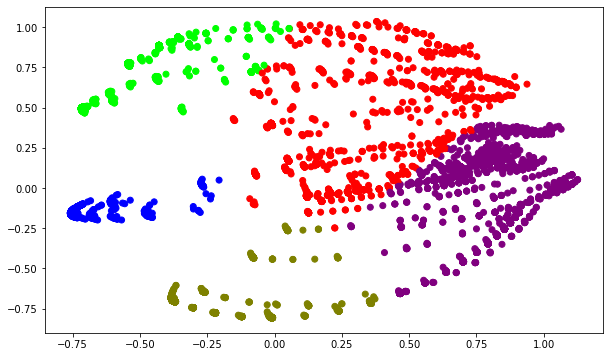

In [73]:
# plt.scatter(df_pca['A1'], df_pca['A2'], 
# c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
# plt.show()

plt.scatter(principal_component_k["Component 1"], principal_component_k["Component 2"], c = KMeans(n_clusters = 5, random_state = 42).fit_predict(principal_component_k), cmap = "brg")


#### Interpreting Clusters

In [74]:
clustering = pd.concat([new_credit_card, pd.DataFrame({"Clusters": k_means.labels_})], axis = 1)
clustering.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,Clusters
0,2.0,11.0,3.0,1.0,3.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,4
1,17.0,11.0,1.0,1.0,1.0,18.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,1
2,16.0,11.0,11.0,11.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,11.0,14.0,14.0,1.0,5.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,4
4,11.0,11.0,1.0,1.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,4
5,15.0,11.0,14.0,1.0,14.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
6,10.0,11.0,19.0,18.0,10.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,2
7,15.0,11.0,8.0,1.0,8.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,0
8,12.0,11.0,12.0,10.0,5.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,4
9,4.0,11.0,14.0,14.0,1.0,1.0,11.0,11.0,11.0,11.0,...,0,0,0,0,0,0,0,0,0,4


C:\Users\Belinda Gan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


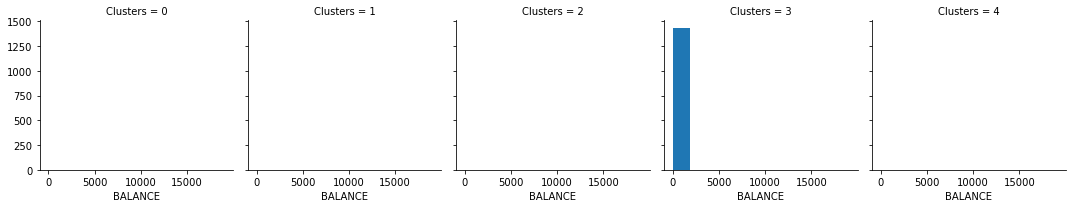

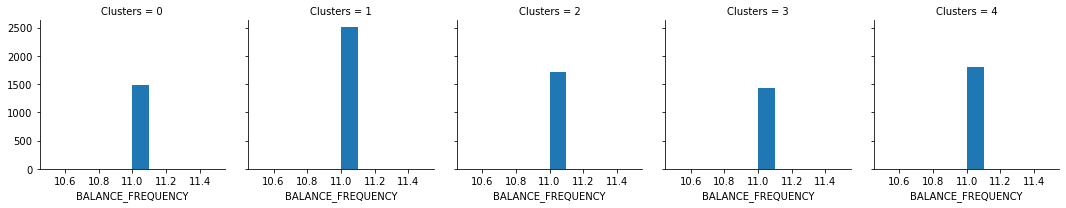

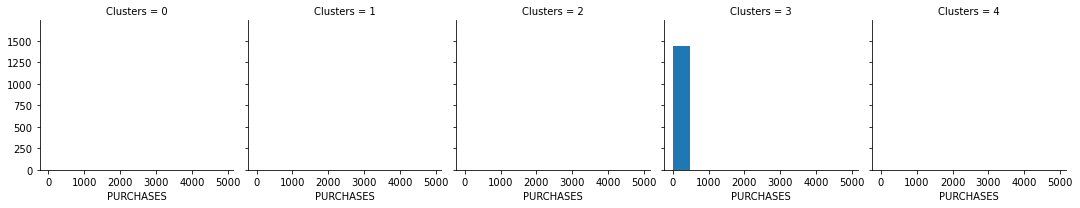

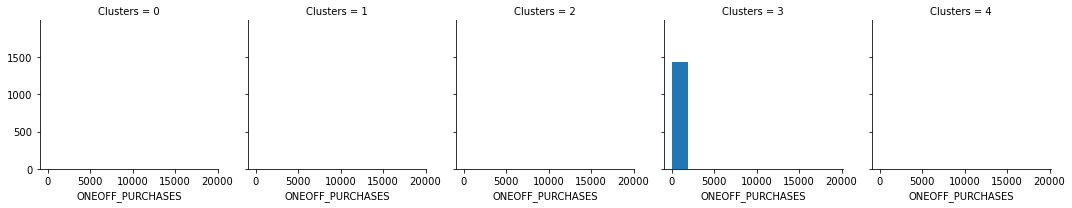

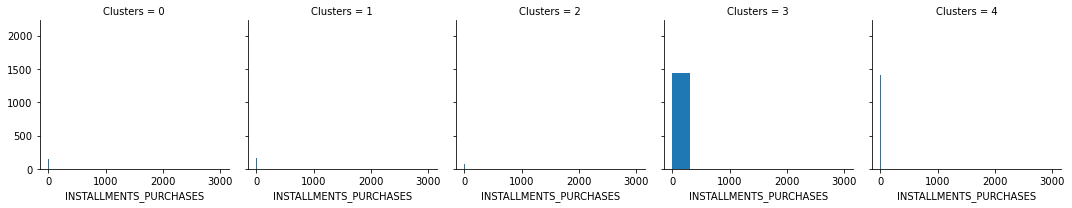

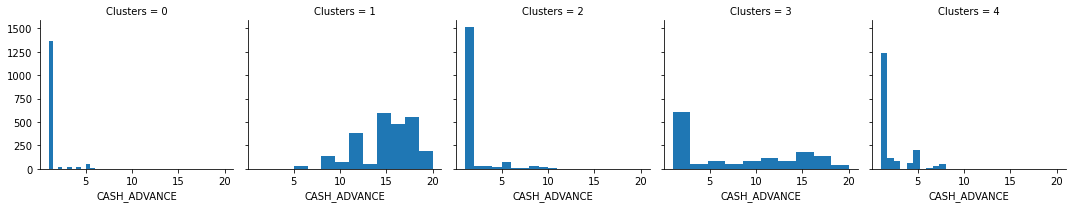

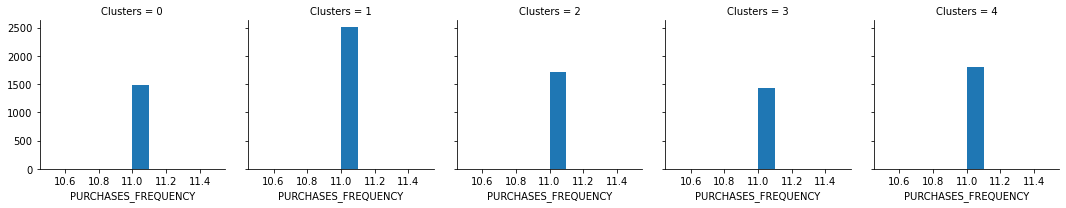

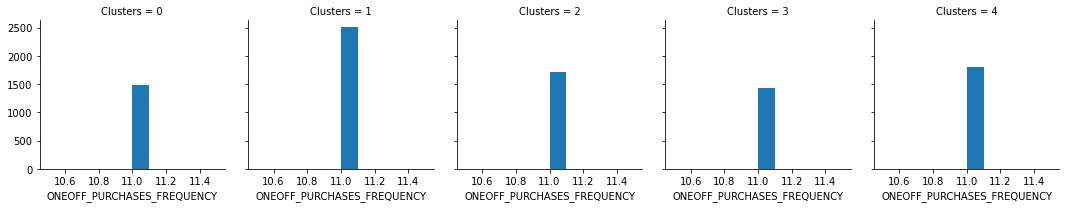

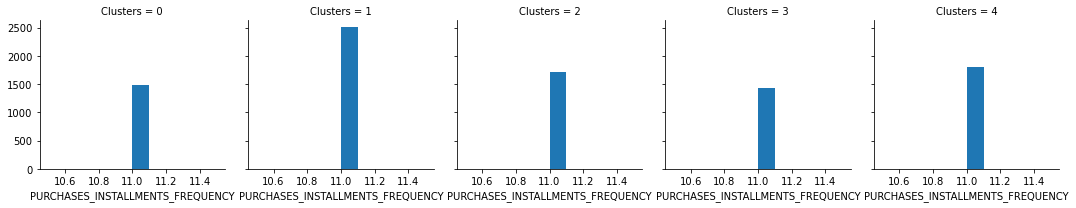

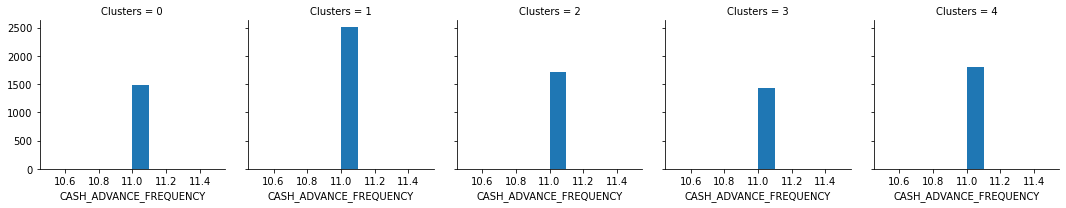

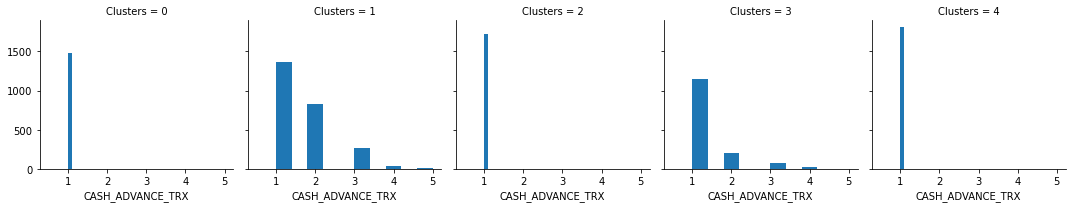

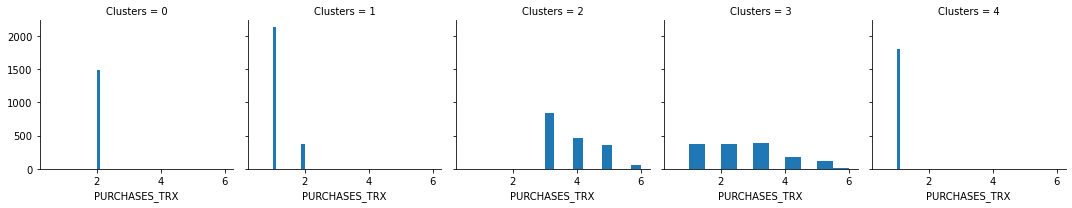

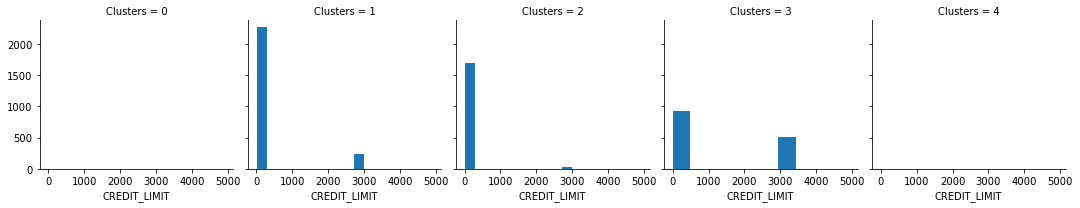

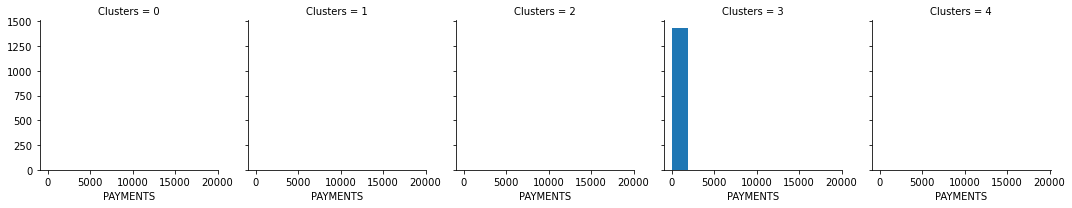

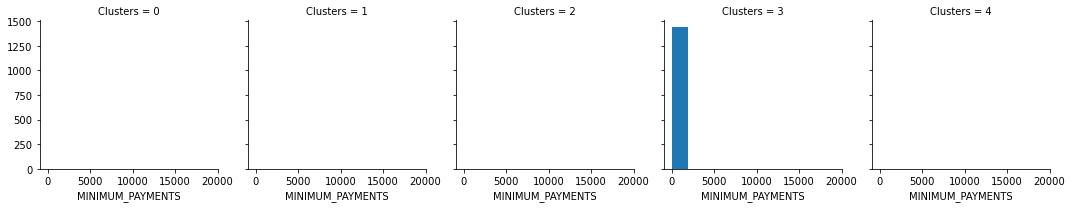

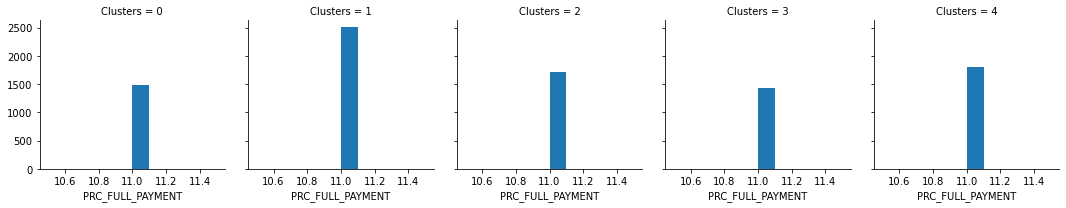

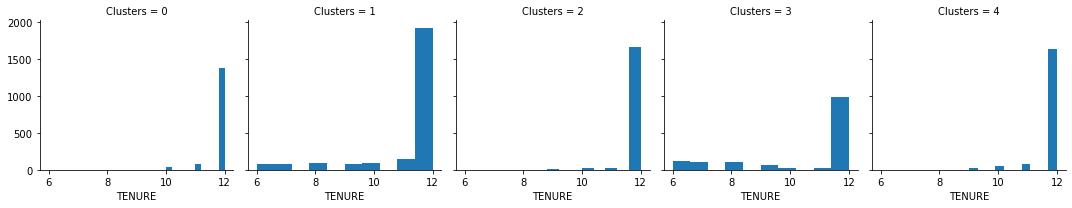

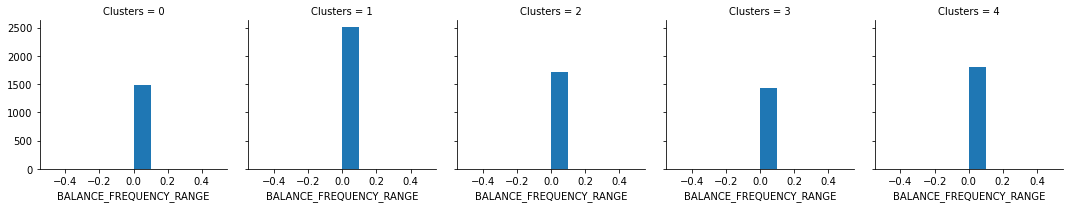

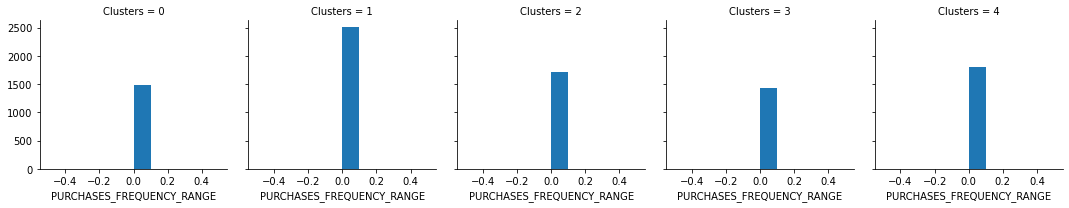

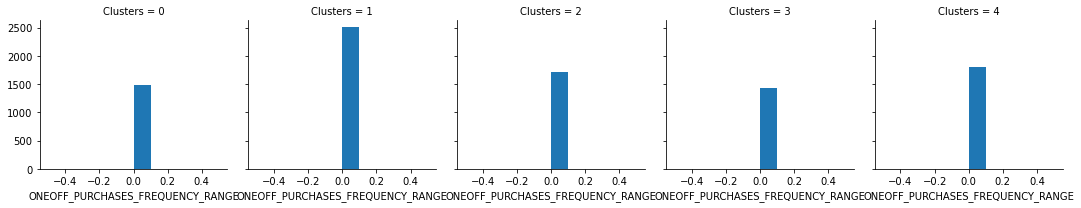

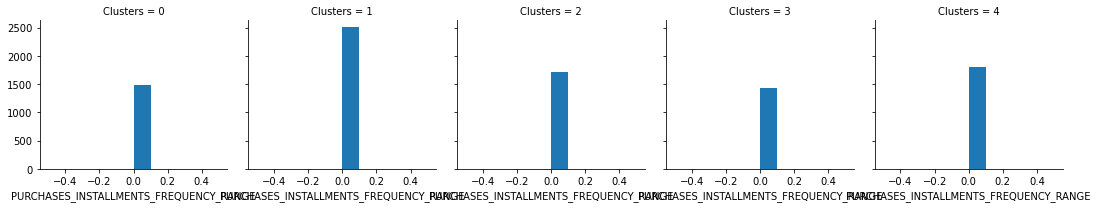

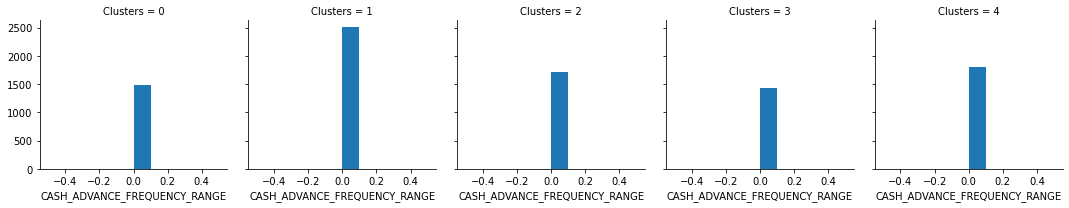

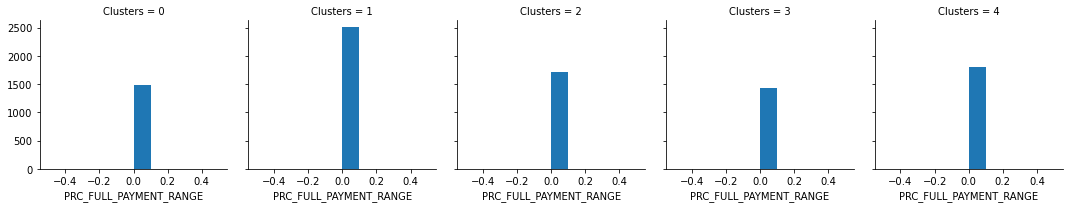

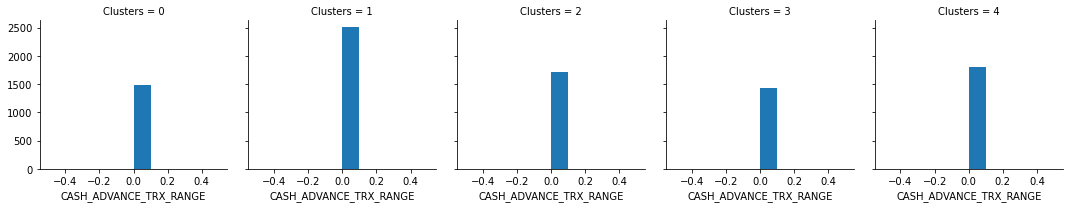

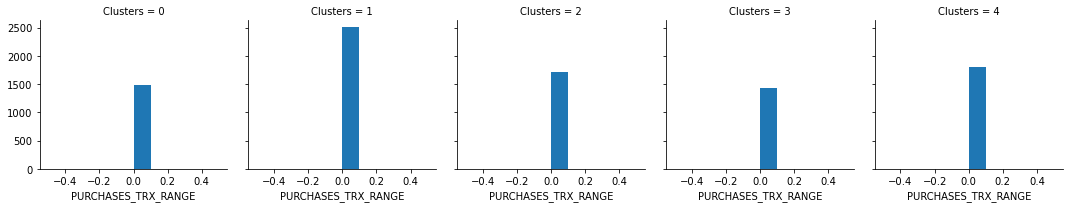

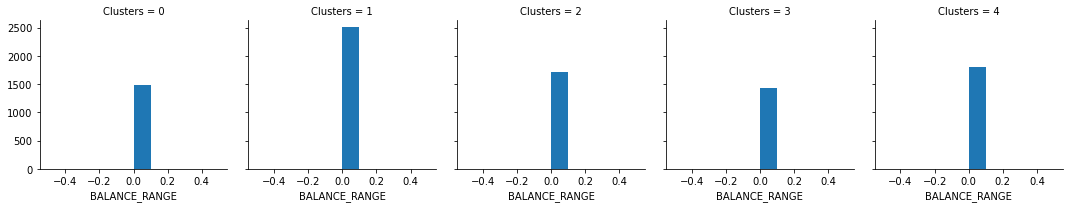

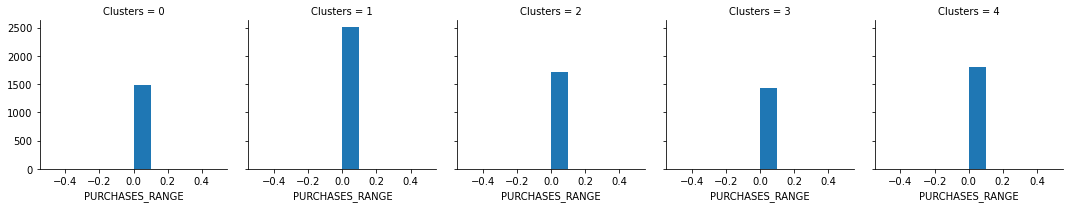

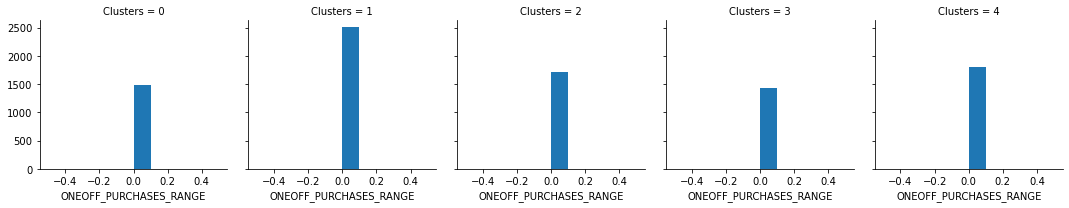

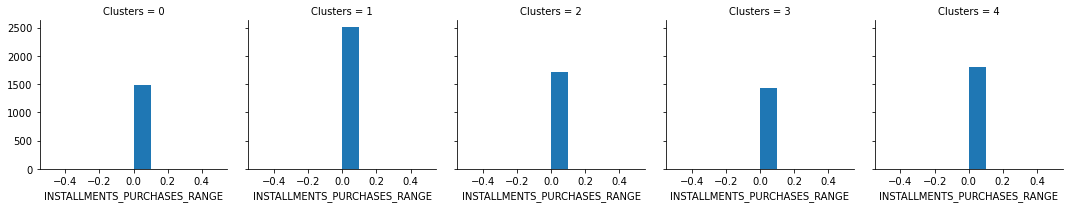

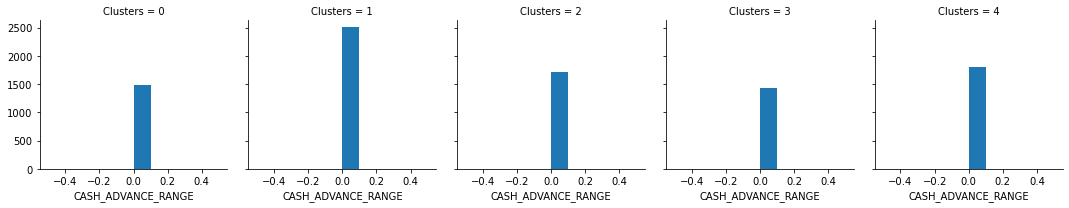

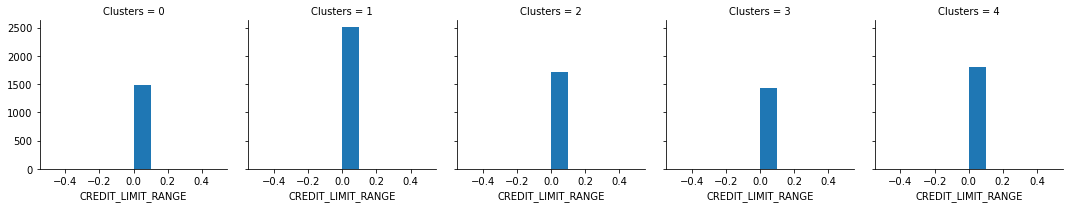

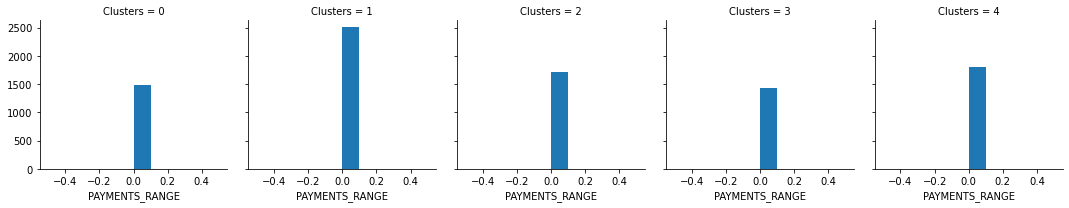

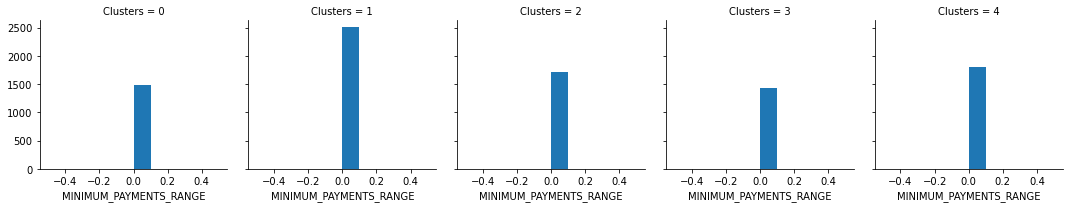

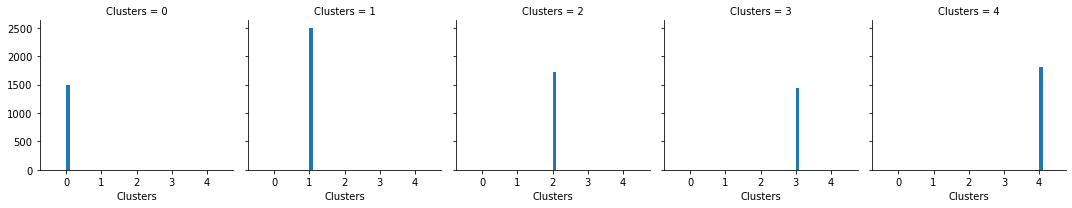

In [75]:
# to interpret the K-Means clusters
for cluster in clustering:
    grid = sns.FacetGrid(clustering, col = "Clusters")
    grid.map(plt.hist, cluster)

In [76]:
# Further analysis about Cluster 0, 1, 2, 3, and 4 is in ASSIGNMENT 8 Unsupervised Learning.docx

In [78]:
principal_component_k.head(10)

,Component 1,Component 2
0,-0.374977,-0.704888
1,0.894663,-0.183069
2,-0.743437,-0.174273
3,-0.014778,-0.794598
4,-0.368746,-0.707651
5,-0.734211,-0.120637
6,-0.430272,0.884215
7,-0.756414,-0.157054
8,-0.382273,-0.694092
9,-0.375142,-0.696501


In [79]:
principal_component_k["Clusters"] = y_predict2

In [89]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BALANCE                                 8950 non-null   float64
 1   BALANCE_FREQUENCY                       8950 non-null   float64
 2   PURCHASES                               8950 non-null   float64
 3   ONEOFF_PURCHASES                        8950 non-null   float64
 4   INSTALLMENTS_PURCHASES                  8950 non-null   float64
 5   CASH_ADVANCE                            8950 non-null   float64
 6   PURCHASES_FREQUENCY                     8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY              8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY        8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY                  8950 non-null   float64
 10  CASH_ADVANCE_TRX                        8950 non-null   int6

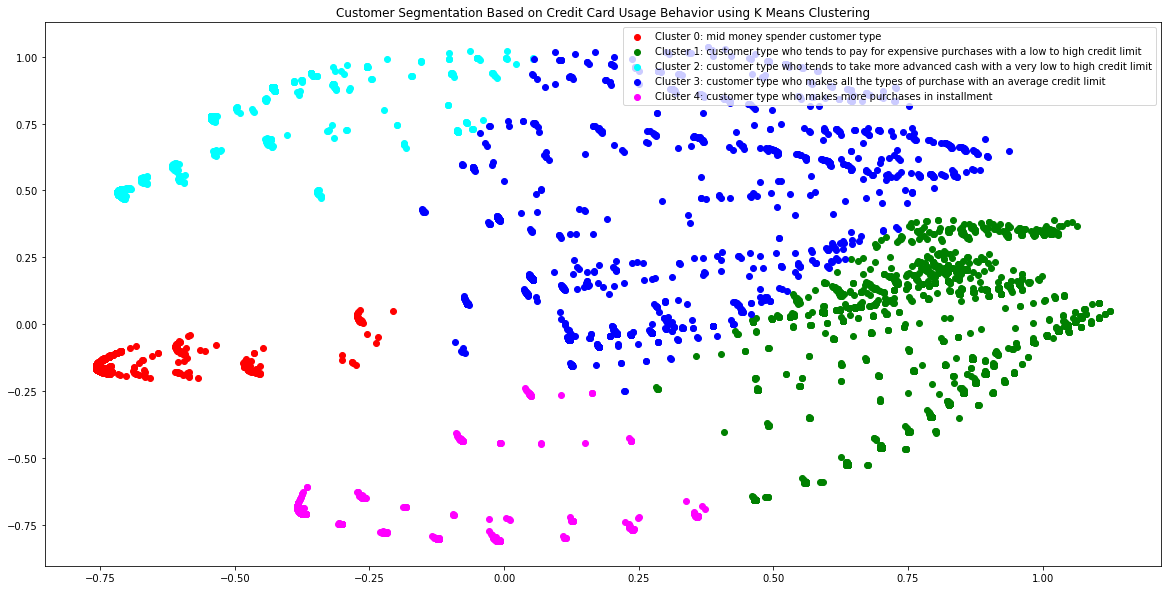

In [87]:
plt.figure(figsize = (20, 10))
plt.scatter(principal_component_k.loc[principal_component_k["Clusters"] == 0, "Component 1"], principal_component_k.loc[principal_component_k["Clusters"] == 0, "Component 2"], c = "r", label = "Cluster 0: mid money spender customer type")
plt.scatter(principal_component_k.loc[principal_component_k["Clusters"] == 1, "Component 1"], principal_component_k.loc[principal_component_k["Clusters"] == 1, "Component 2"], c = "g", label = "Cluster 1: customer type who tends to pay for expensive purchases with a low to high credit limit")
plt.scatter(principal_component_k.loc[principal_component_k["Clusters"] == 2, "Component 1"], principal_component_k.loc[principal_component_k["Clusters"] == 2, "Component 2"], c = "cyan", label = "Cluster 2: customer type who tends to take more advanced cash with a very low to high credit limit")
plt.scatter(principal_component_k.loc[principal_component_k["Clusters"] == 3, "Component 1"], principal_component_k.loc[principal_component_k["Clusters"] == 3, "Component 2"], c = "b", label = "Cluster 3: customer type who makes all the types of purchase with an average credit limit")
plt.scatter(principal_component_k.loc[principal_component_k["Clusters"] == 4, "Component 1"], principal_component_k.loc[principal_component_k["Clusters"] == 4, "Component 2"], c = "fuchsia", label = "Cluster 4: customer type who makes more purchases in installment")
plt.title("Customer Segmentation Based on Credit Card Usage Behavior using K Means Clustering")
plt.legend()
plt.show()

In [88]:
print("\n\n")

## Conclusion

Based on K-Means and Hierarchical Clustering visualization, I can conclude that K-Means gives better customer segmentation with more detailed cluster segmentation. For instance, K-Means histogram has more datas about credit limit, so we can know more detailed information about the customers. Above are the visualization (both histograms and scatter plots) for customer segmentation based on credit card usage behaviour using Hierarchical Clustering and K Means Clustering. 

In [90]:
print("\n")

### Resources

1. https://www.kaggle.com/cemutku/k-means-and-hierarchical-clustering-implementation

2. https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering

3. https://www.kaggle.com/vickydavid/customer-clustering

4. https://www.kaggle.com/abhijitbiswas040/kmeans-hierarchial-clustering

5. https://youtu.be/COUWKVf6zKY

6. https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

7. https://www.kaggle.com/ecedolen/machine-l-on-credit-card-customer-segmentation

8. https://youtu.be/KOW4ecqnTow

9. https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

10. https://www.kaggle.com/abhijitbiswas040/kmeans-hierarchial-clustering

11. https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca

12. https://www.kaggle.com/angieashraf/unsupervised-machine-learning-for-customer-segment

13. https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation

14. https://www.kaggle.com/mostafaomar/cluster-for-credit-card

15. https://www.kaggle.com/mahmoudnabil97/credit-card

16. https://www.kaggle.com/smlopezza/customer-segmentation-credit-card-transactions

17. https://www.kaggle.com/pmrich/clustering-approaches-k-mean-birch-agg

18. https://www.data-mania.com/blog/customer-profiling-and-segmentation-in-python/